# Exercise 3

All the imports we are going to need:

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Question 1
1. Analyze the Manhattan rolling sales dataset. Where in Manhattan is the most/least expensive real estate located? What is the relationship between the sales price and gross square feet?

We start by loading in the Manhattan rolling sales dataset. 

In [108]:
df = pd.read_excel(r'Datasets\rollingsales_manhattan.xls', skiprows=4)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376,24,,C0,264 EAST 7TH STREET,,...,3,0,3,2059,3696,1900,1,C0,7738700,2016-12-22
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,...,11,0,11,1750,6500,1900,2,C4,3750000,2017-04-03
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,2016-12-14
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,2016-12-09
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,6300000,2016-08-04


For this question we need to clean the dataset and remove rows that have a value of 0 in the sale price column. It is also important to acknowledge that there are entries with a sale price of 1. One could argue that it does not feel realistic to sell real estate for 1. Since this dataset reguards real estate in Manhattan we can almost assume that the currency used for the dataset is american dollars. However, we can not assume what "1" means, the price data could be enterd in thousand dollars for example, which means a entry of "1" would acctually be "1 000". Even if this is not the case there have been real estates sold for 1 dollar. This could be because the estate is heavily damaged and renovation costs could be high. 

In [109]:
df = df[df["SALE PRICE"] != 0]

### Most Expensive

Most expensive real estate location in Manhattan:

In [110]:
mostExpensive = df.sort_values(by='SALE PRICE', ascending=False)
mostExpensive.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12339,1,TRIBECA,21 OFFICE BUILDINGS,4,216,1,,O9,390 GREENWICH STREET,,...,0,4,4,172327,2354290,1989,4,O4,1767913114,2016-06-10
7418,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1291,10,,O4,550 MADISON AVENUE,,...,0,8,8,36803,827686,1983,4,O4,1400000000,2016-05-26
9690,1,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1004,29,,O4,1285 AVENUE OF THE AMER,,...,0,77,77,80333,1613847,1961,4,O4,1279624000,2016-05-20


Above we see the three most expensive real estate in the manhattan area. The most expensive real estate is a office building in the Tribeca neighborhood. 

### Least Expensive

To find the least expensive real estates location in Manhattan we first have to remove the rows without a selling price:

In [113]:

leastExpensiveNoZeros = df[df["SALE PRICE"] != 0]
leastExpensive = leastExpensiveNoZeros.sort_values(by='SALE PRICE', ascending=True)
leastExpensive.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4935,1,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2B,1753,49,,C4,46 EAST 129 STREET,,...,10,0,10,3747,14310,1910,2,C4,1,2016-06-08
13686,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1446,1176,,R4,308 EAST 72ND STREET,20C,...,1,0,1,0,0,0,2,R4,1,2017-02-13
697,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1110,,R4,257 WEST 17TH STREET,4A,...,1,0,1,0,0,0,2,R4,1,2016-09-27
5696,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1666,41,,C4,212 EAST 117 STREET,,...,14,0,14,4037,16989,1910,2,C4,1,2016-12-28
16152,1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1113,1025,,R4,30 WEST 61ST STREET,9A,...,1,0,1,0,0,0,2,R4,1,2017-01-23


As we can see there are multiple estates being sold for 1 dollar. We can count the amount and extract how many in each neighborhood. 

In [116]:
price1 = df[df['SALE PRICE'] == 1]
price1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,0,0,0,0,1920,2,C6,1,2016-09-06
697,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1110,,R4,257 WEST 17TH STREET,4A,...,1,0,1,0,0,0,2,R4,1,2016-09-27
1487,1,CLINTON,07 RENTALS - WALKUP APARTMENTS,2B,1058,23,,C7,415 WEST 48TH,,...,8,1,9,2500,9220,1901,2,C7,1,2016-06-09
1651,1,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1063,1129,,R4,425 W 53RD,310,...,1,0,1,0,0,2007,2,R4,1,2016-12-12
3336,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,876,1013,,R4,7 GRAMERCY PARK WEST,5A,...,1,0,1,0,0,1913,2,R4,1,2016-11-08


If we want to find the most or least expensive neighborhood we take the mean of every neighborhood and compare them as seen below.

C:\Users\Sofia\AppData\Local\Temp\ipykernel_169580\4128299929.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(neighborhoodPrices.index, rotation=90)


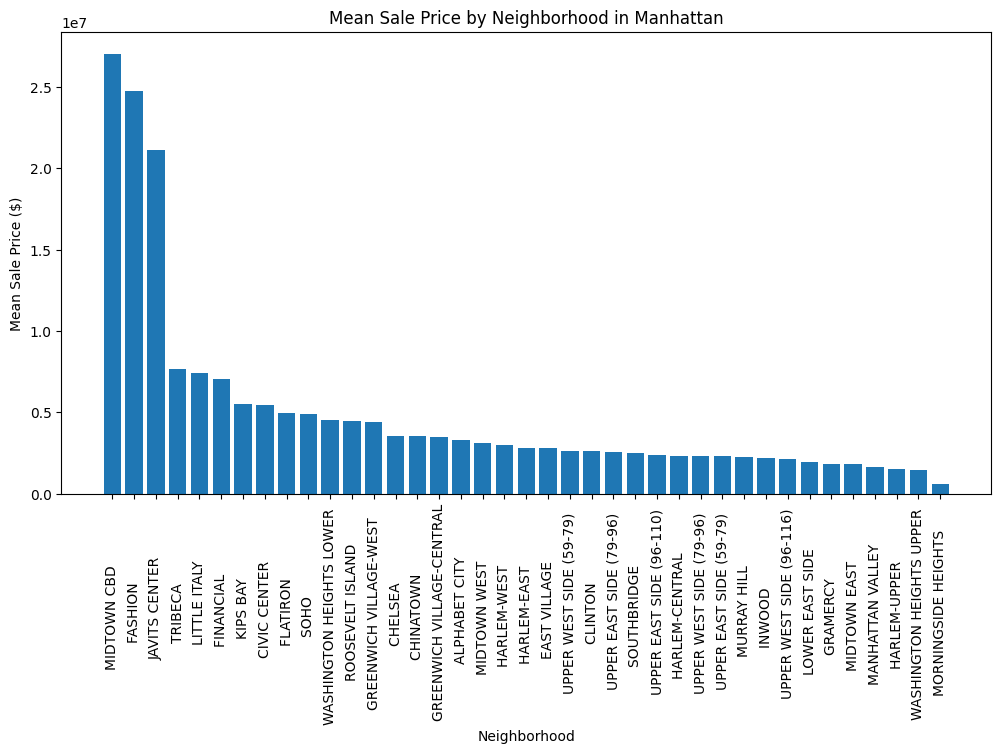

In [112]:
neighborhoodPrices = df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values(ascending=False)

# Create a bar chart of the mean sale price for each neighborhood
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(neighborhoodPrices.index, neighborhoodPrices.values)
ax.set_xticklabels(neighborhoodPrices.index, rotation=90)
ax.set_title('Mean Sale Price by Neighborhood in Manhattan')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Mean Sale Price ($)')
plt.show()